In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
!unzip '/content/drive/MyDrive/archive (14).zip' -d '/usr/local'

Streaming output truncated to the last 5000 lines.
  inflating: /usr/local/train/sad/Training_65242339.jpg  
  inflating: /usr/local/train/sad/Training_65267116.jpg  
  inflating: /usr/local/train/sad/Training_65275626.jpg  
  inflating: /usr/local/train/sad/Training_6529266.jpg  
  inflating: /usr/local/train/sad/Training_65329617.jpg  
  inflating: /usr/local/train/sad/Training_65338712.jpg  
  inflating: /usr/local/train/sad/Training_65338797.jpg  
  inflating: /usr/local/train/sad/Training_65387162.jpg  
  inflating: /usr/local/train/sad/Training_65404494.jpg  
  inflating: /usr/local/train/sad/Training_65426218.jpg  
  inflating: /usr/local/train/sad/Training_65430136.jpg  
  inflating: /usr/local/train/sad/Training_65437377.jpg  
  inflating: /usr/local/train/sad/Training_6545735.jpg  
  inflating: /usr/local/train/sad/Training_65463385.jpg  
  inflating: /usr/local/train/sad/Training_65473985.jpg  
  inflating: /usr/local/train/sad/Training_65502829.jpg  
  inflating: /usr/local

In [ ]:
training_set = train_datagen.flow_from_directory('/usr/local/train',target_size=(64,64), batch_size=32,class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_set = test_datagen.flow_from_directory('/usr/local/test',target_size=(64,64), batch_size=32, class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),

    tf.keras.layers.Conv2D(32, 3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 63s 61ms/step - accuracy: 0.2544 - loss: 1.8859 - val_accuracy: 0.3702 - val_loss: 1.5958
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 0.3288 - loss: 1.6808 - val_accuracy: 0.4186 - val_loss: 1.5201
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3611 - loss: 1.6232 - val_accuracy: 0.4186 - val_loss: 1.4731
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.3769 - loss: 1.5863 - val_accuracy: 0.3905 - val_loss: 1.5790
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.3950 - loss: 1.5463 - val_accuracy: 0.4575 - val_loss: 1.4436
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.4029 - loss: 1.5337 - val_accuracy: 0.4299 - val_loss: 1.4570
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.4168 - loss: 1.5052 - val_accuracy: 0.4412 - val_loss: 1.4714
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.4259 - loss: 1.4793 - 

Evaluation of model on test data:
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5526 - loss: 1.1916
Test Loss: 1.2057
Test Accuracy: 0.5442


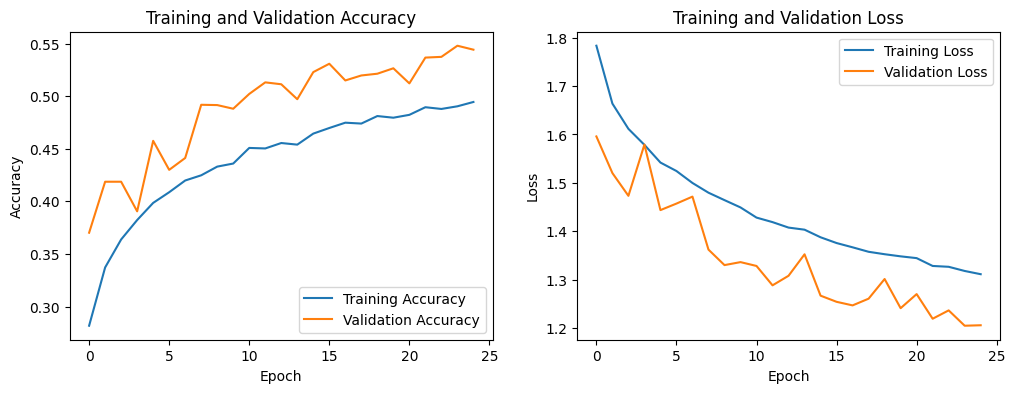

In [ ]:
print('Evaluation of model on test data:')
loss, accuracy = cnn.evaluate(test_set)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = cnn.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes

class_labels = list(test_set.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.16      0.14      0.15       958
     disgust       0.00      0.00      0.00       111
        fear       0.11      0.04      0.06      1024
       happy       0.24      0.33      0.28      1774
     neutral       0.18      0.22      0.20      1233
         sad       0.17      0.16      0.16      1247
    surprise       0.12      0.13      0.13       831

    accuracy                           0.19      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.17      0.19      0.18      7178



Building a predictive system

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
input_image = image.load_img('/usr/local/test/happy/PrivateTest_10077120.jpg', target_size = (64,64))
input_image_resized = input_image.resize((64,64))
input_image_array = image.img_to_array(input_image_resized)
input_image_expanded = np.expand_dims(input_image_array, axis = 0)
input_image_expanded = input_image_expanded / 255.0
result = cnn.predict(input_image_expanded)

predicted_class_index = np.argmax(result)


class_labels = list(training_set.class_indices.keys())
prediction = class_labels[predicted_class_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
print(prediction)

happy
